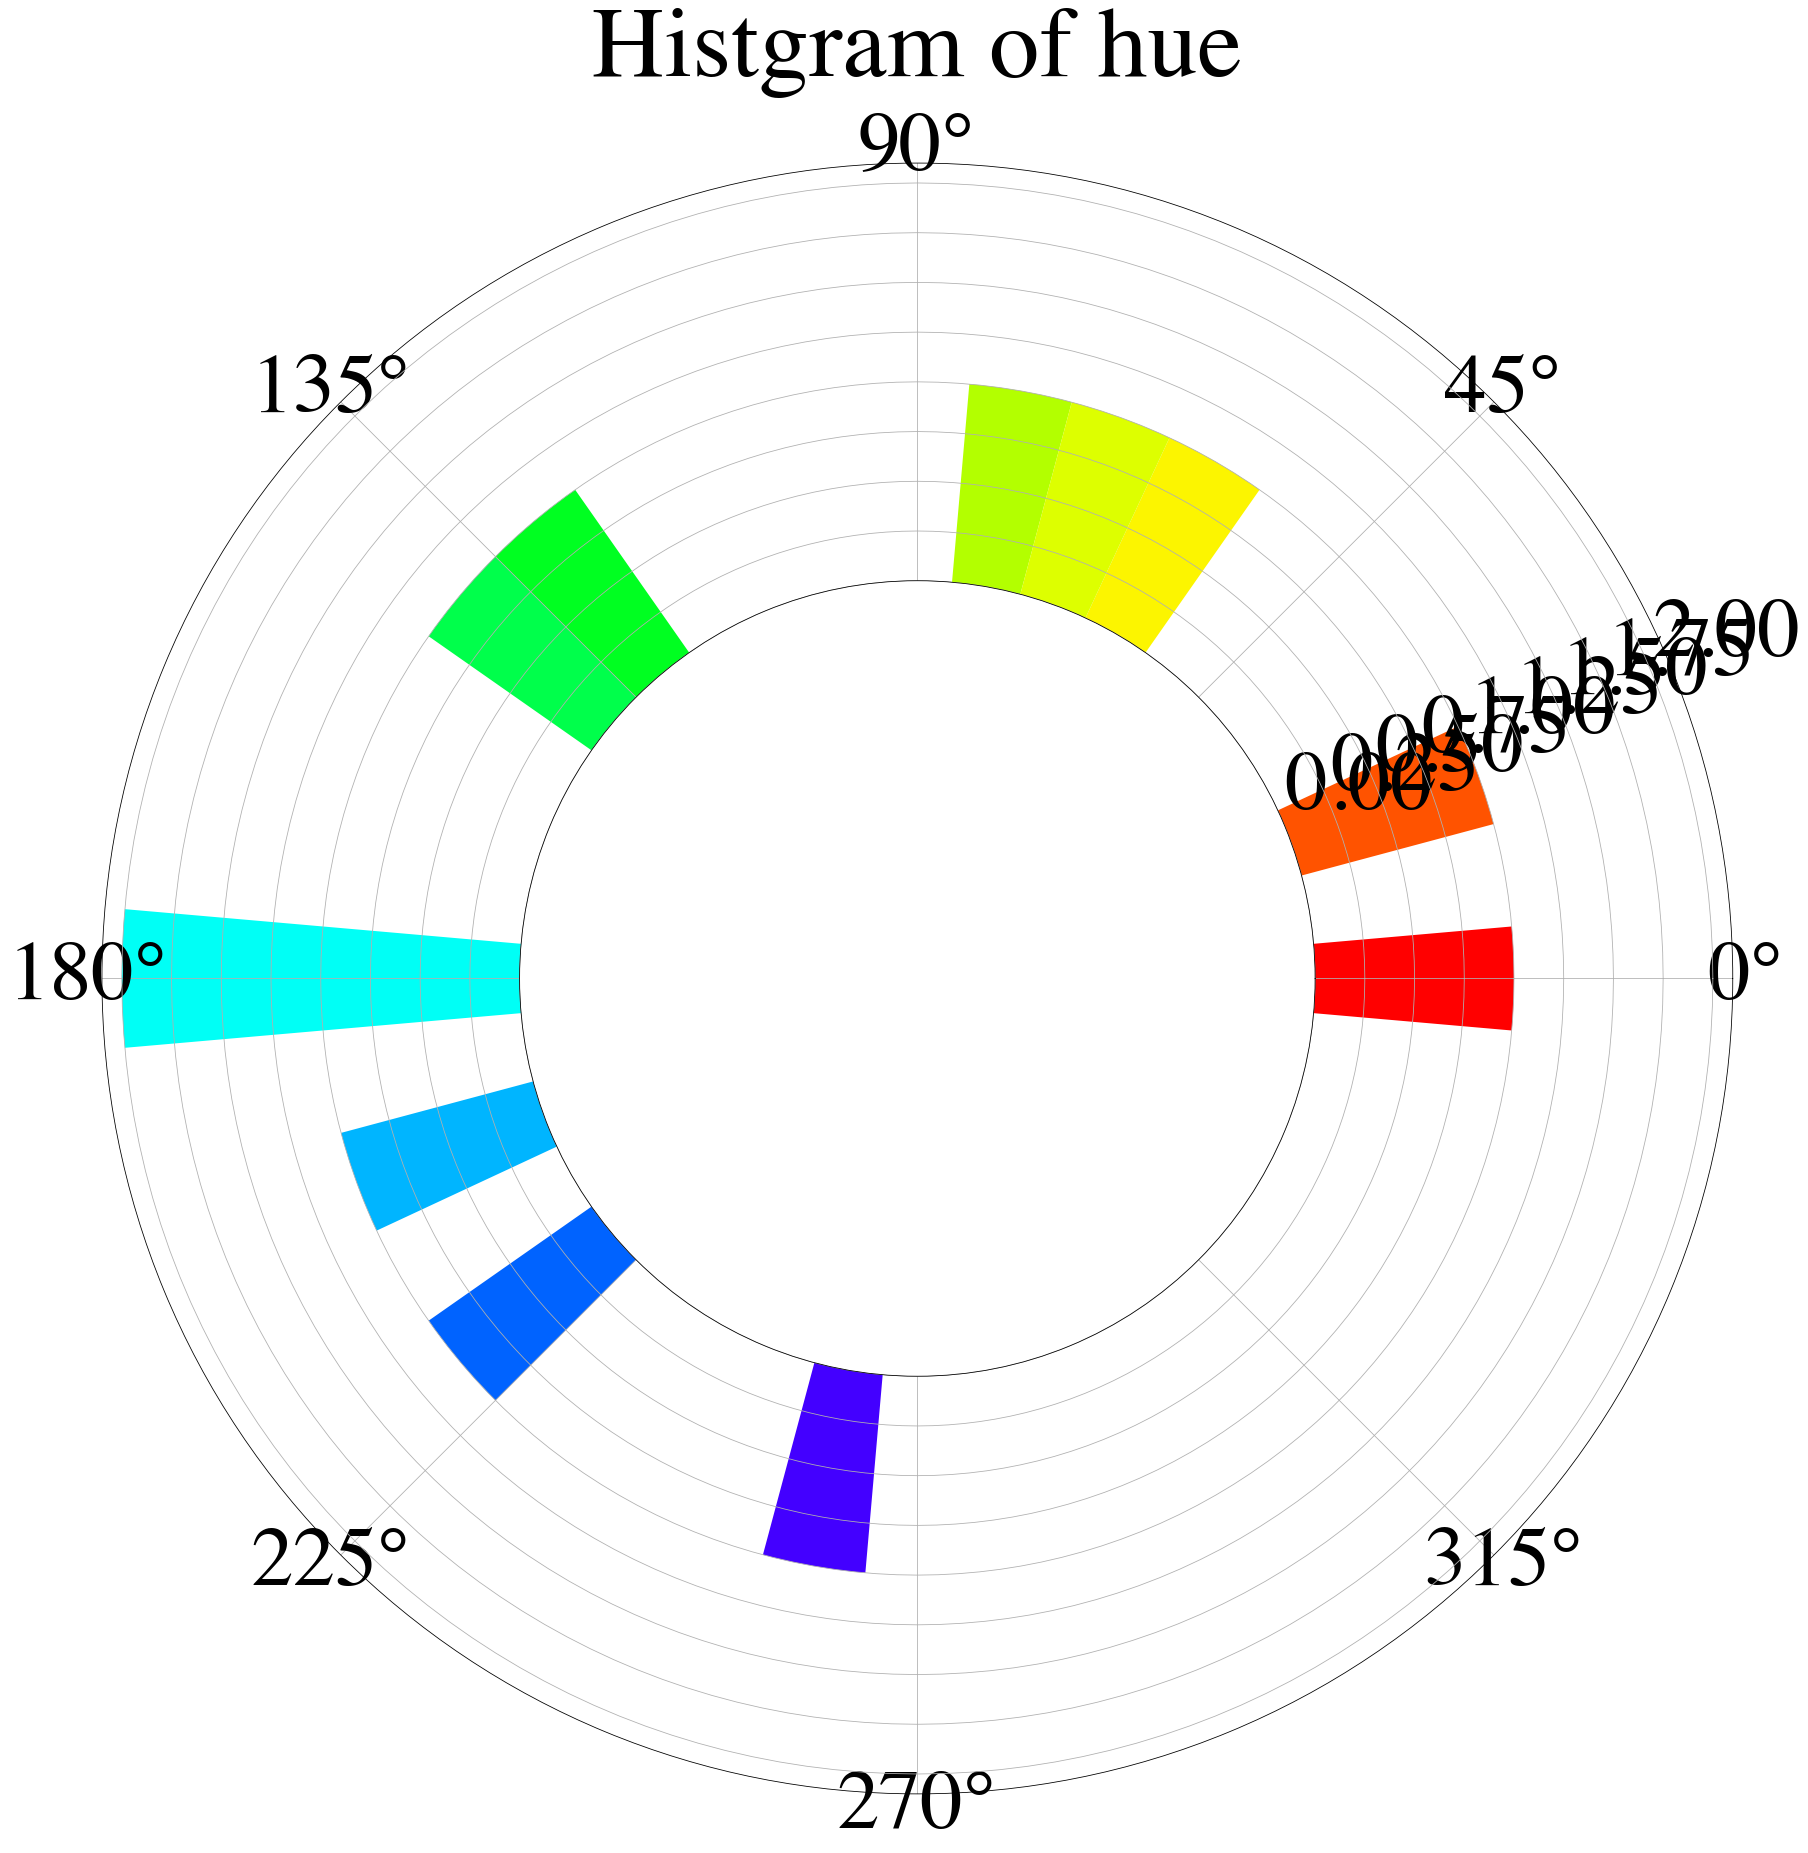

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import collections
import pprint

path_hue = "./data/pilot_study/csv/each_parameter/df_each_parameter_hue.csv"
each_parameter_list_hue = pd.read_csv(path_hue, header=0, index_col=0)
# valence and arousal are anearly zero
each_parameter_list_hue = each_parameter_list_hue.T[
    (-0.05 < each_parameter_list_hue.T["arousal"]) & (each_parameter_list_hue.T["arousal"] < 0.05) &
    (-0.05 < each_parameter_list_hue.T["valence"]) & (each_parameter_list_hue.T["valence"] < 0.05)
].T
# Compute pie slices
N = 36
theta = sorted([math.radians(theta) for theta in each_parameter_list_hue.loc["sliderHue"].values])
theta_collection = sorted(collections.Counter(theta).items())

radii = []
for i, j in theta_collection:
    radii.append(j)
theta_np = np.array(list(set(theta)))
radii = np.array(radii)
width = 2 * np.pi / 36
width2 = math.degrees(2*np.pi / 36)
colors = plt.cm.hsv(theta_np/2/np.pi)

# main
fig = plt.figure(figsize=(30, 30))
plt.rcParams.update({'font.size': 85})
plt.rcParams['font.family'] = 'Times'
# sub
ax = fig.add_subplot(111, polar=True)
ax.set_title("Histgram of hue", fontsize=100)
# ax2 = fig.add_subplot(122, polar=False)
# labels
# ax2.set_xlabel("Hue(degree)", fontsize=65)
# ax2.set_ylabel("Frequency", fontsize=65)
# offset
ax.set_rorigin(-2)
# grid visibility
ax.grid(True)

# plot
bars = ax.bar(theta_np, radii, width=width, bottom=0, color=colors)
# bars2 = ax2.bar(theta_np, radii, width=width, bottom=0, color=colors)

plt.show()
# fig.savefig("./data/pilot_study/image/hue_polar_hist.png")


## 